East-West Airlines is trying to learn more about its customers.  Key issues are their
flying patterns, earning and use of frequent flyer rewards, and use of the airline credit
card.  The task is to identify customer segments via clustering.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

from sklearn.cluster import KMeans

In [34]:
df = pd.read_excel('../clustering/EastWestAirlines.xlsx',sheet_name='data', engine='openpyxl')

df = df[df.columns[1:]]
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [77]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


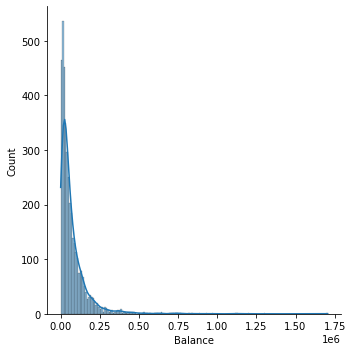

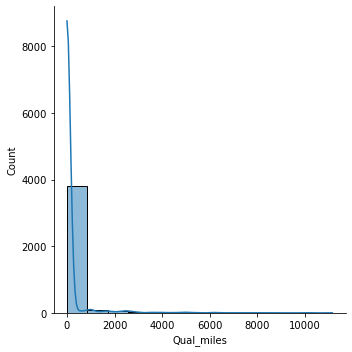

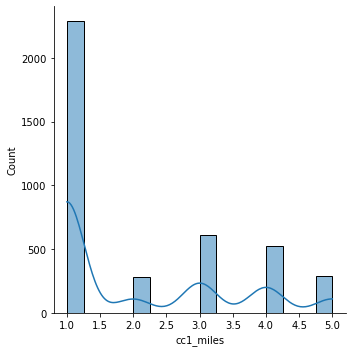

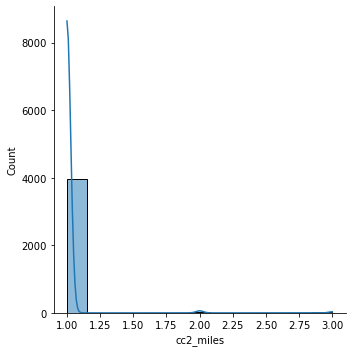

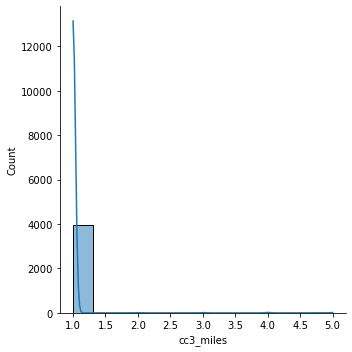

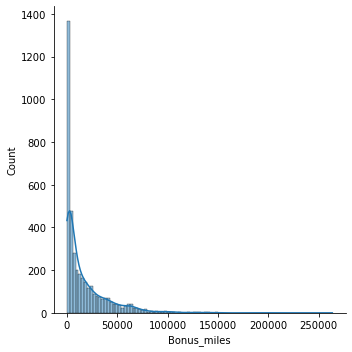

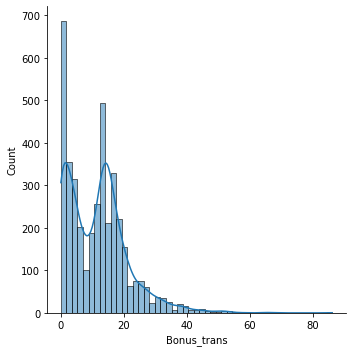

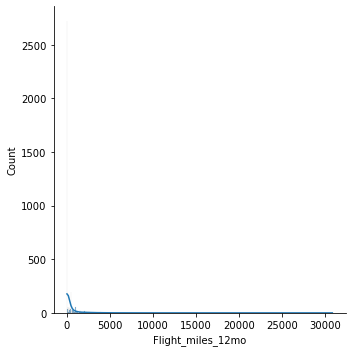

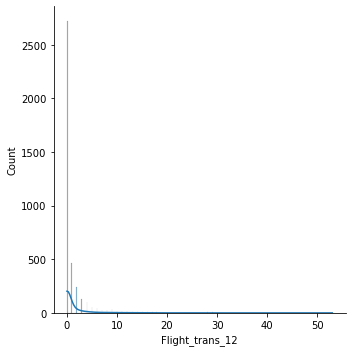

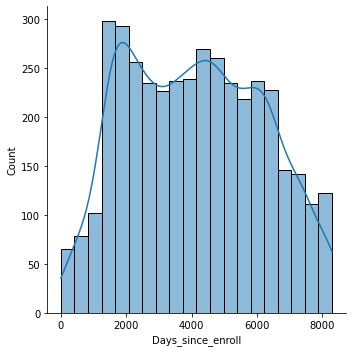

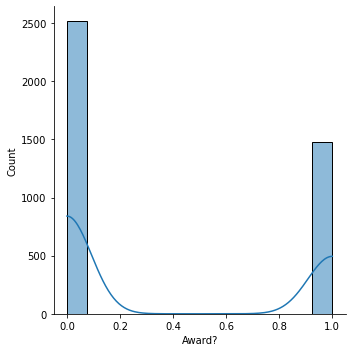

In [35]:
## Perform EDA 

## Check distribution of data in each variables
for col in df.columns:
    sns.displot(df[col],kde=True)

In [38]:
print(df.isnull().sum())## check for null values

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [84]:
## Since the data is skewed we have to transform the data using log transformation 
from scipy.stats import yeojohnson
df_transform = pd.DataFrame()
for col in df.columns:
    df_transform[col],lambda_ = yeojohnson(df[col])


df_transform.describe()


c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\scipy\optimize\optimize.py:2621: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,28.422703,0.024098,0.484178,0.017596,0.011871,27.740218,3.838665,0.798276,0.155423,537.917526,0.126961
std,6.698204,0.098475,0.074204,0.000000,0.000000,15.191657,2.285933,1.168398,0.230295,207.631570,0.165567
min,0.000000,-0.000000,0.421501,0.017596,0.011871,0.000000,0.000000,-0.000000,-0.000000,1.674220,-0.000000
25%,23.997684,-0.000000,0.421501,0.017596,0.011871,17.877800,1.856326,-0.000000,-0.000000,367.326842,-0.000000
50%,28.393682,-0.000000,0.421501,0.017596,0.011871,28.746212,4.491667,-0.000000,-0.000000,551.939847,-0.000000
75%,32.913023,-0.000000,0.562720,0.017596,0.011871,39.149302,5.468040,2.432560,0.404359,708.490268,0.342820
max,56.332762,0.426407,0.596341,0.017596,0.011871,70.878324,12.510208,2.719510,0.579145,918.136851,0.342820


c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


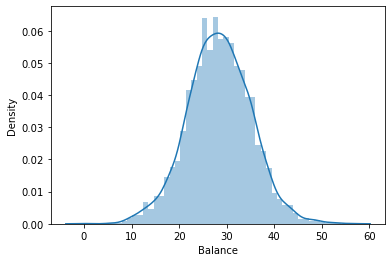

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


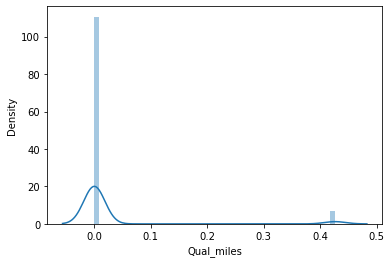

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


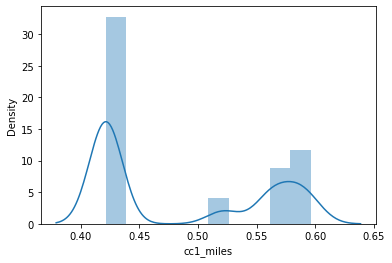

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


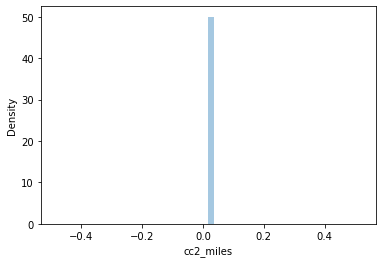

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


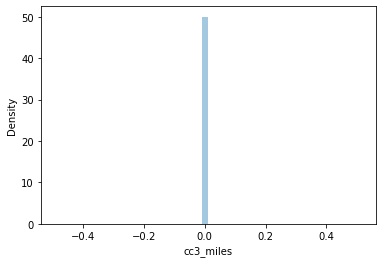

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


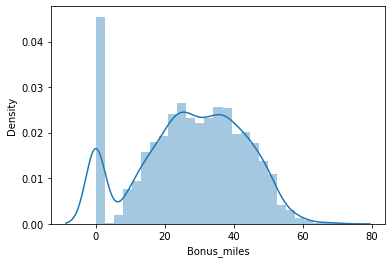

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


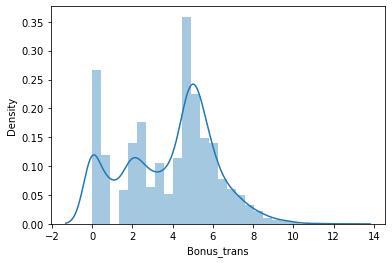

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


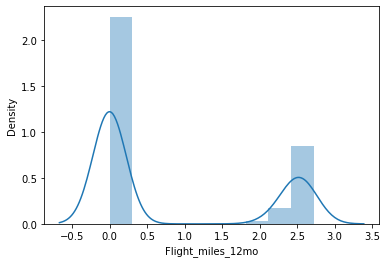

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


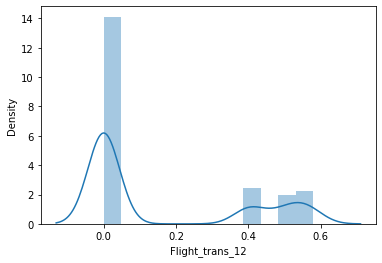

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


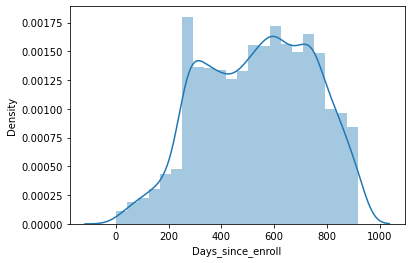

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


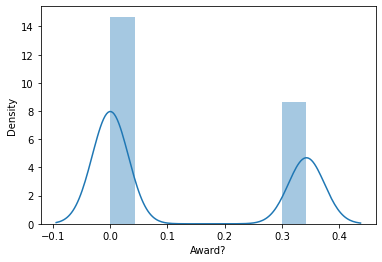

In [88]:
for col in df_transform.columns:
    sns.distplot(df_transform[col],kde=True)
    plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_transform)

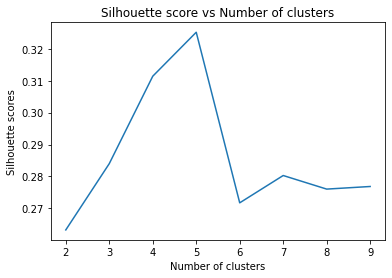

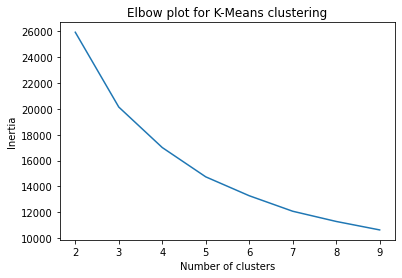

In [98]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = range(2,10)
silhouette_scores = []
inertias = []
for i in (n_clusters):
    kmeans = KMeans(n_clusters=i)

    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled,kmeans.labels_))
    inertias.append(kmeans.inertia_)
import matplotlib.pyplot as plt


plt.plot(n_clusters,silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')
plt.title('Silhouette score vs Number of clusters')
plt.show()

plt.plot(n_clusters, inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot for K-Means clustering')
plt.show()

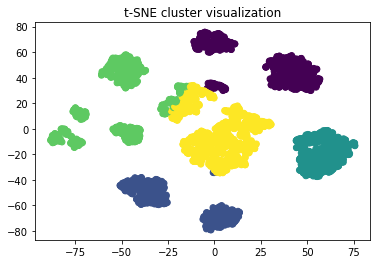

In [128]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_df = tsne.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=5)

kmeans.fit(tsne_df)

cluster_labels = kmeans.labels_

## visualise the data

plt.scatter(tsne_df[:,0],tsne_df[:,1], c=cluster_labels)

plt.title('t-SNE cluster visualization')
plt.show()




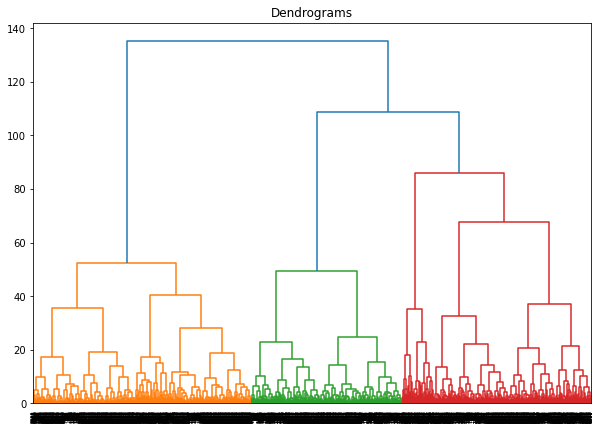

In [116]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

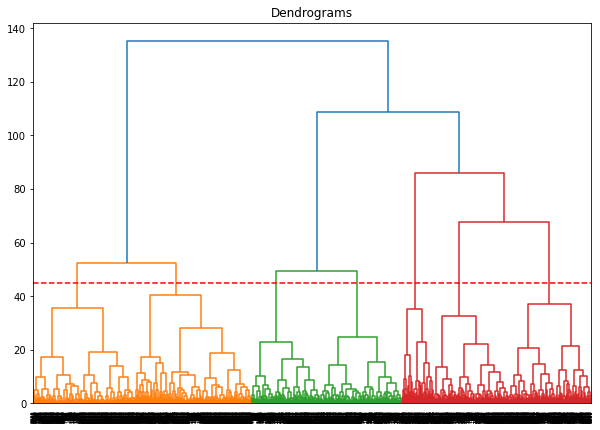

In [118]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=45, color='r', linestyle='--')

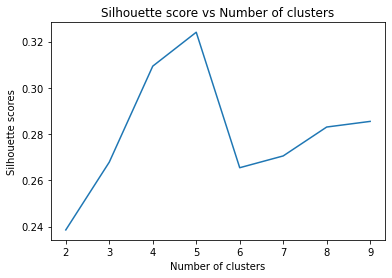

In [122]:
plt.plot(n_clusters_list,silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')
plt.title('Silhouette score vs Number of clusters')
plt.show()

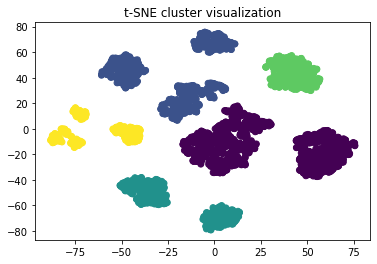

In [129]:
from sklearn.cluster import AgglomerativeClustering

h_clust = AgglomerativeClustering(n_clusters=5,linkage='ward')

h_clust.fit(tsne_df)

cluster_labels = h_clust.labels_

## visualise the data

plt.scatter(tsne_df[:,0],tsne_df[:,1], c=cluster_labels)

plt.title('t-SNE cluster visualization')
plt.show()

In [121]:
from sklearn.metrics import silhouette_score

# Create a list of values for n_clusters
n_clusters_list = range(2, 10)

# Calculate the silhouette score for each value of n_clusters
silhouette_scores = []
for n_clusters in n_clusters_list:
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
    clustering_model.fit(df_scaled)
    score = silhouette_score(df_scaled, clustering_model.labels_)
    silhouette_scores.append(score)

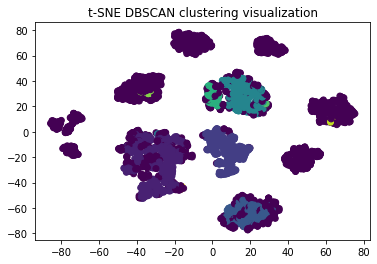

In [137]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)

dbscan.fit(df_scaled)

# Get the cluster labels for each data point
cluster_labels = dbscan.labels_

tsne_data = tsne.fit_transform(df_scaled)

# Visualize the clusters
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels)
plt.title('t-SNE DBSCAN clustering visualization')
plt.show()

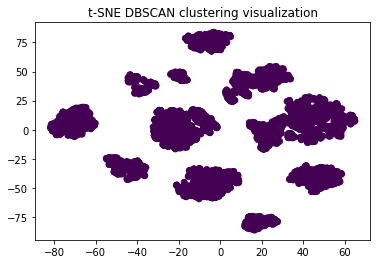

In [140]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=10)
tsne_data = tsne.fit_transform(df_scaled)

dbscan.fit(tsne_data)

# Get the cluster labels for each data point
cluster_labels = dbscan.labels_


# Visualize the clusters
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels)
plt.title('t-SNE DBSCAN clustering visualization')
plt.show()